In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

2025-03-02 10:20:44.940405: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 10:20:44.948260: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:20:45.038045: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:20:45.104161: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740890145.149908     874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740890145.16

In [3]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'


data_dir = tf.keras.utils.get_file(origin=dataset_url,cache_dir='.' ,untar=True)

In [4]:
data_dir

'./datasets/flower_photos.tgz'

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos.tgz')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:3]

[PosixPath('datasets/flower_photos.tgz/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('datasets/flower_photos.tgz/roses/1756973583_4aac7df00d_m.jpg'),
 PosixPath('datasets/flower_photos.tgz/roses/15277801151_5ed88f40f0_n.jpg')]

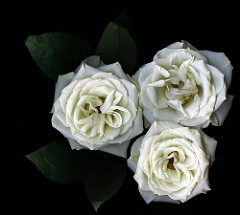

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:3]

[PosixPath('datasets/flower_photos.tgz/tulips/14171673854_1208c19be3_m.jpg'),
 PosixPath('datasets/flower_photos.tgz/tulips/8713398906_28e59a225a_n.jpg'),
 PosixPath('datasets/flower_photos.tgz/tulips/14487712670_aebe715525_m.jpg')]

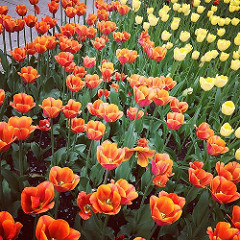

In [10]:
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': roses,
    'tulips': tulips,
    'daisies': list(data_dir.glob('daisies/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'dandelion': list(data_dir.glob('dandelion/*'))
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'tulips': 1,
    'daisies': 2,
    'sunflowers': 3,
    'dandelion': 4
}

In [13]:
img = cv2.imread(flowers_images_dict['roses'][0])
img.shape


(248, 320, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y = [],[]

for flowers_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(image)
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])

In [16]:
X = np.array(X)
y= np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:


cnn = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #layers.Conv2D(32, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),


    layers.Flatten(),


    layers.Dense(128, activation='relu'),
    layers.Dense(5,activation='softmax')
])


cnn.compile(optimizer='adam',loss='tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)',metrics=['accuracy'])
cnn.fit(X_train_scaled,y_train,epochs=3)

2025-03-02 10:21:00.661608: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
cnn.evaluate(X_test_scaled,y_test)

In [ ]:
prediction = cnn.predict(X_test_scaled)
prediction

In [ ]:
score = tf.nn.softmax(prediction[0])
score

In [ ]:
np.argmax(score)

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.9)
])

In [ ]:
plt.axis('off')
plt.imshow(X[0])


In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [ ]:


cnn = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    #layers.Conv2D(64, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),

    layers.Dropout(0,2),
    layers.Flatten(),


    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])


cnn.compile(optimizer='adam',loss='tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)',metrics=['accuracy'])
cnn.fit(X_train_scaled,y_train,epochs=3)